<a href="https://colab.research.google.com/github/doliq/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


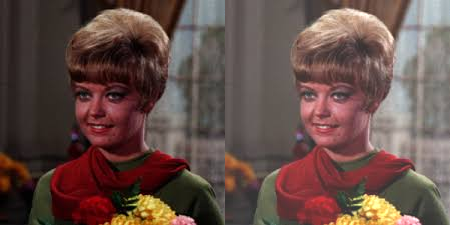

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

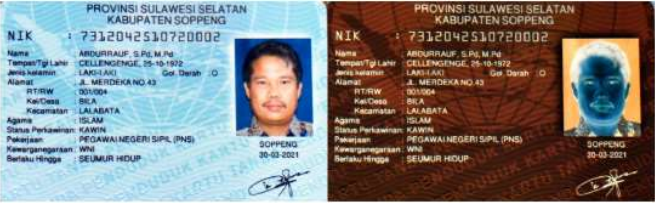

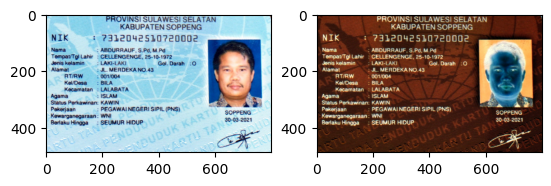

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_real = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_inverse = 255 - img_real

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_real)
ax[1].imshow(img_inverse)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:60
Masukkan kontras [1.0 - 3.0]:1.5


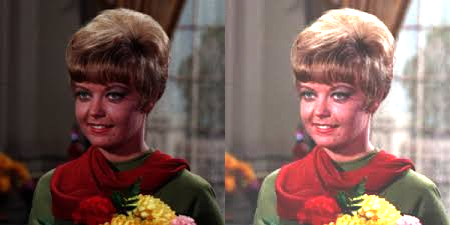

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpeg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


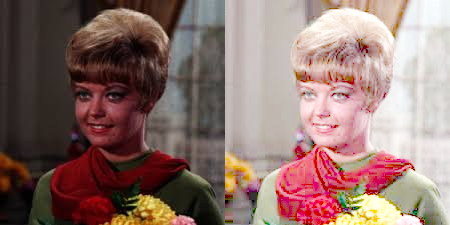

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


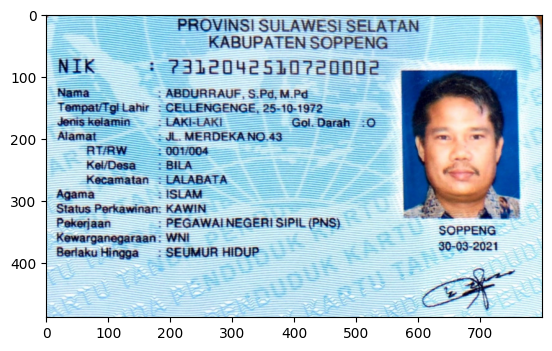

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

a. Averaging

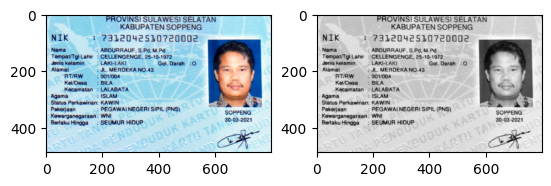

In [ ]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

b. Lightness

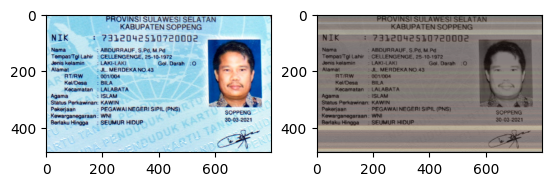

In [ ]:
img_light = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

c. Luminance

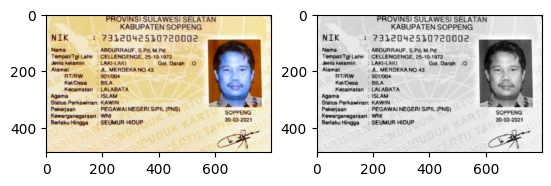

In [ ]:
img_lum = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut

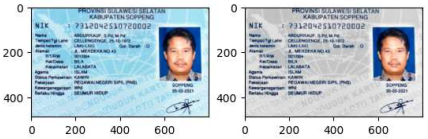

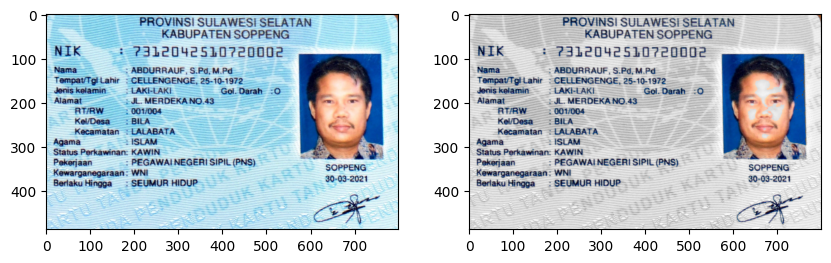

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img_rgb[:, :, 2], 180, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:, :, 2] = mask

gray_background = cv.cvtColor(mask3, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_gray = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)

# Mengatur latar belakang abu-abu menjadi warna asli
img_gray[mask3[:, :, 2] == 0] = img_rgb[mask3[:, :, 2] == 0]

img_blue_text = img_rgb.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if mask3[i, j, 2] == 255:
            img_blue_text[i, j] = [0, 0, 255]

# Mengatur alpha channel hanya pada latar belakang
alpha_channel = np.ones((img.shape[0], img.shape[1], 1), dtype=np.uint8) * 255
alpha_channel[mask3[:, :, 2] == 50] = 0

# Menggabungkan gambar utama dengan alpha channel
out = np.dstack((img_gray, alpha_channel))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[1].imshow(out)
plt.show()